# Primeira abordagem de predição: conjunto completo
- primeiro é testada a correlação linear
  - de todas as features entre si
  - de todas as features com a flag detrator
- depois segue para a predição:
  - sem equilibrar amostras
  - sem validação cruzada
  - sem otimização de parâmetros

## Bibliotecas e Configurações

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

## Importação dos Dados

In [2]:
df = pd.read_csv('NPS_Complete_UFF_2022-07-18_2022-12-31_extra-tratado.csv', sep=';')

display(df)

,ANF,USERVALUEQ1_LABEL,USERVALUEQ2_VALUE,vol_Rede_Social,vol_Video,vol_Comunicacao,vol_Loja_de_Apps,vol_Musica,vol_Google,vol_Navegacao,...,term_fabr_motorola,term_fabr_não informado,term_fabr_outros,term_fabr_samsung,term_fabr_xiaomi,device_tech_2G,device_tech_3G,device_tech_4G,device_tech_5G,Qtd_CRM
0,51,8,Não Informado,8.111028,6.282269,5.894406,5.347112,-6.907755,3.295874,3.295874,...,0,0,0,0,0,0,0,1,0,0
1,11,9,Plano/Bonus,7.180832,5.153297,5.283209,1.946053,-6.907755,-6.907755,-6.907755,...,0,0,0,1,0,0,0,1,0,0
2,37,10,Velocidade,8.094379,5.846442,6.682110,2.890427,4.844195,1.609638,-6.907755,...,1,0,0,0,0,0,0,1,0,0
3,81,10,Outros,4.897847,5.771444,1.386544,-6.907755,-6.907755,0.001000,-6.907755,...,0,0,1,0,0,0,1,0,0,0
4,85,10,Sinal/Cobertura,3.784212,3.434019,5.918897,1.791926,-6.907755,1.386544,-6.907755,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,48,0,Sinal/Cobertura,5.262695,5.398167,3.828663,5.075180,-6.907755,0.001000,-6.907755,...,0,0,0,0,1,0,0,1,0,0
45202,35,7,Sinal/Cobertura,7.978654,6.054442,7.756196,3.912043,-6.907755,3.401231,-6.907755,...,0,0,0,1,0,0,0,1,0,0
45203,43,10,Duracao pacote dados,3.434019,5.332724,4.248510,1.386544,-6.907755,-6.907755,-6.907755,...,1,0,0,0,0,0,0,0,1,0
45204,42,10,Sinal/Cobertura,-6.907755,5.159061,1.386544,-6.907755,-6.907755,-6.907755,-6.907755,...,0,0,0,1,0,0,1,0,0,0


### Notas atribuídas (distribuição)

In [3]:
df['USERVALUEQ1_LABEL'].value_counts() # divisão de clientes por nota atribuída

10    18937
8      5477
9      4578
0      4099
7      2879
5      2756
6      1684
1      1438
3      1202
2      1147
4      1009
Name: USERVALUEQ1_LABEL, dtype: int64

### Exclusão de colunas que vazam dados na predição

In [5]:
df = df.drop(columns=['USERVALUEQ1_LABEL', 'USERVALUEQ2_VALUE', 'NPS_Class_Promotor', 'NPS_Class_Passivo'])

## Visualizar df

In [6]:
display(df.head())
df.info()

,ANF,vol_Rede_Social,vol_Video,vol_Comunicacao,vol_Loja_de_Apps,vol_Musica,vol_Google,vol_Navegacao,vol_InternetBank,vol_Transporte,...,term_fabr_motorola,term_fabr_não informado,term_fabr_outros,term_fabr_samsung,term_fabr_xiaomi,device_tech_2G,device_tech_3G,device_tech_4G,device_tech_5G,Qtd_CRM
0,51,8.111028,6.282269,5.894406,5.347112,-6.907755,3.295874,3.295874,-6.907755,-6.907755,...,0,0,0,0,0,0,0,1,0,0
1,11,7.180832,5.153297,5.283209,1.946053,-6.907755,-6.907755,-6.907755,-6.907755,1.946053,...,0,0,0,1,0,0,0,1,0,0
2,37,8.094379,5.846442,6.682110,2.890427,4.844195,1.609638,-6.907755,1.386544,-6.907755,...,1,0,0,0,0,0,0,1,0,0
3,81,4.897847,5.771444,1.386544,-6.907755,-6.907755,0.001000,-6.907755,-6.907755,-6.907755,...,0,0,1,0,0,0,1,0,0,0
4,85,3.784212,3.434019,5.918897,1.791926,-6.907755,1.386544,-6.907755,-6.907755,-6.907755,...,0,1,0,0,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45206 entries, 0 to 45205
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ANF                        45206 non-null  int64  
 1   vol_Rede_Social            45206 non-null  float64
 2   vol_Video                  45206 non-null  float64
 3   vol_Comunicacao            45206 non-null  float64
 4   vol_Loja_de_Apps           45206 non-null  float64
 5   vol_Musica                 45206 non-null  float64
 6   vol_Google                 45206 non-null  float64
 7   vol_Navegacao              45206 non-null  float64
 8   vol_InternetBank           45206 non-null  float64
 9   vol_Transporte             45206 non-null  float64
 10  vol_Jogos                  45206 non-null  float64
 11  vol_MarketPlace            45206 non-null  float64
 12  vol_TIM                    45206 non-null  float64
 13  vol_Alimentacao            45206 non-null  flo

## Correlação Linear (Heatmap)

### Todas as features entre si

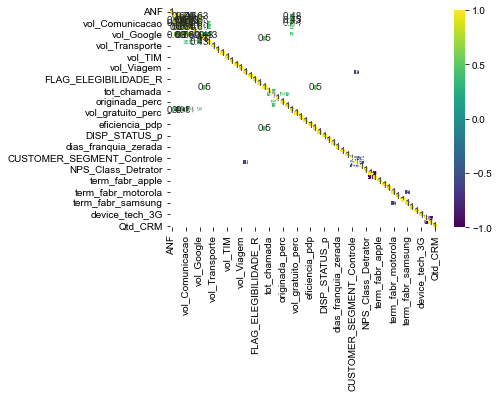

In [8]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix[(corrMatrix >= 0.4) | (corrMatrix <= -0.4)], annot=True, cmap='viridis') # mostra apenas correlações >= 0.4 e <= -0.4
sns.set(rc={'figure.figsize':(40, 40)})
sns.set(font_scale=1.4)
sns.set_style('white')

### NPS_Class_Detrator com todas as outras features

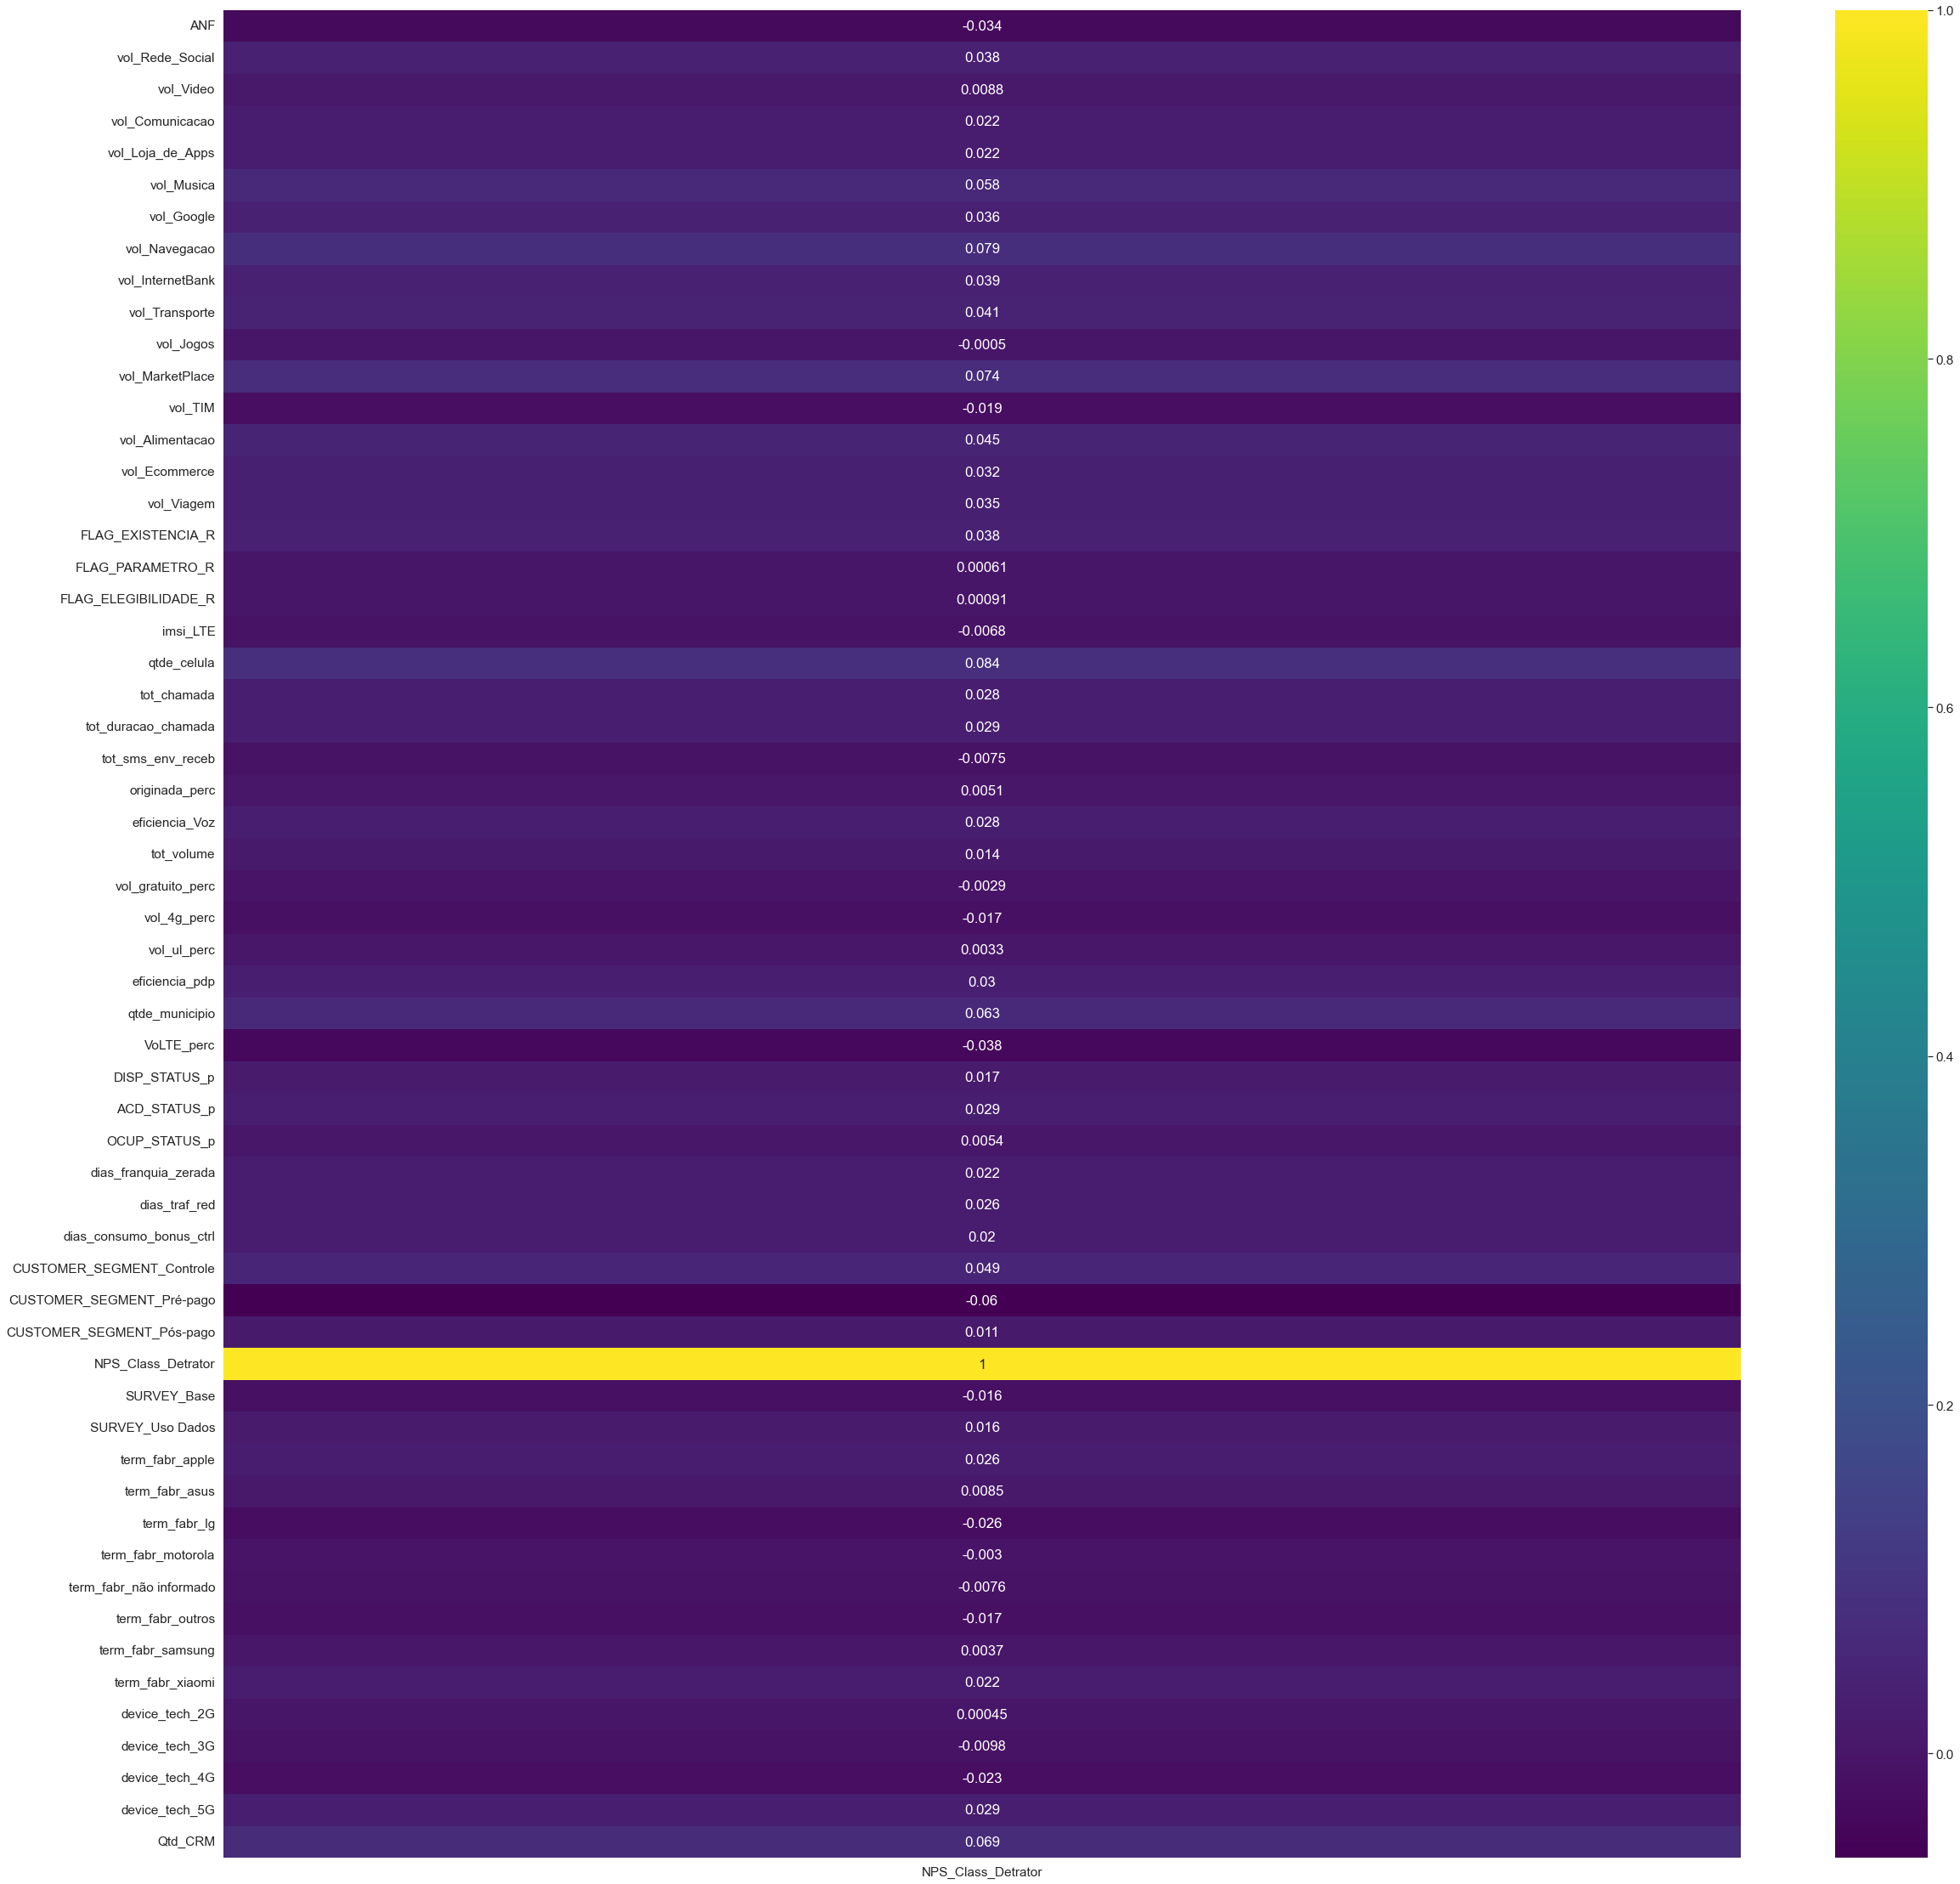

In [9]:
# heatmap apenas da coluna NPS_Class_Detrator com as outras
corrMatrix = df.corr()
sns.heatmap(corrMatrix[['NPS_Class_Detrator']], annot=True, cmap='viridis')
sns.set(rc={'figure.figsize':(40, 40)})
sns.set(font_scale=1.4)
sns.set_style('white')

## Machine Learning

### Bibliotecas

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

### Train Test Split

In [11]:
X_df = df.drop("NPS_Class_Detrator", axis=1)
y_df = df.NPS_Class_Detrator # Alvo

# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=1) # 70% treino, 30% teste


### Pré-processamento com Standard Scaler -> não precisa p/ modelos de árvore

In [12]:
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Devemos aplicar o fit_transform somente nos dados de treino
X_train_scaled = scaler.fit_transform(X_train)
# Devemos aplicar o transform somente nos dados de teste
X_test_scaled = scaler.transform(X_test)

# Transformando os dados de volta em DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Verificando se foram normalizados
# X_train_scaled.describe()'''

# TESTE - MinMaxScaler
'''from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Devemos aplicar o fit_transform somente nos dados de treino
X_train_scaled = scaler.fit_transform(X_train)
# Devemos aplicar o transform somente nos dados de teste
X_test_scaled = scaler.transform(X_test)

# Transformando os dados de volta em DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)'''

# Verificando se foram normalizados
# X_train_scaled.describe()


'from sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\n\n# Devemos aplicar o fit_transform somente nos dados de treino\nX_train_scaled = scaler.fit_transform(X_train)\n# Devemos aplicar o transform somente nos dados de teste\nX_test_scaled = scaler.transform(X_test)\n\n# Transformando os dados de volta em DataFrame\nX_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)\nX_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)'

### Random Forest

In [13]:
rf = RandomForestClassifier(n_estimators=100)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

F1-SCORE:

n_estimators=10 == 0.57 

n_estimators=100 == 0.61

n_estimators=200 == 0.63

n_estimators=1000 == 0.63

n_estimators=1500 == 0.63

n_estimators=2000 == 0.63

... aumento demasiado do custo

In [15]:
# Train a machine learning model
rf.fit(X_train, y_train) # X_train_scaled ou X_train

# Make prediction on the testing data
y_pred = rf.predict(X_test) # X_test_scaled ou X_test

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.99      0.82      9539
           1       0.52      0.03      0.06      4023

    accuracy                           0.70     13562
   macro avg       0.61      0.51      0.44     13562
weighted avg       0.65      0.70      0.60     13562



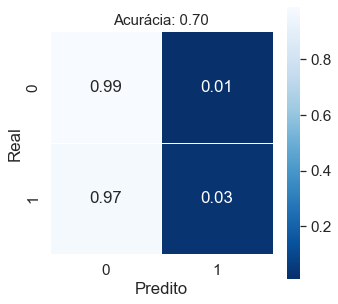

In [17]:
# matriz de confusão
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=0.5, square = True, cmap = 'Blues_r');
plt.ylabel('Real');
plt.xlabel('Predito');
all_sample_title = 'Acurácia: {:.2f}'.format(rf.score(X_test, y_test))
plt.title(all_sample_title, size = 15);
plt.show()

# salvar em pdf
#plt.savefig('plots/rf_cm_trapaceira.pdf', bbox_inches='tight')

In [18]:
# feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                    index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                           importance
qtde_celula                  0.047272
tot_sms_env_receb            0.045404
tot_volume                   0.044885
tot_duracao_chamada          0.044026
tot_chamada                  0.043752
vol_Rede_Social              0.042533
vol_Comunicacao              0.040778
originada_perc               0.040346
vol_Video                    0.039637
eficiencia_Voz               0.038012
vol_Loja_de_Apps             0.033376
ANF                          0.033097
vol_ul_perc                  0.032994
eficiencia_pdp               0.032249
OCUP_STATUS_p                0.031951
vol_Google                   0.030701
DISP_STATUS_p                0.030212
VoLTE_perc                   0.029850
qtde_municipio               0.028655
vol_4g_perc                  0.022756
vol_InternetBank             0.021925
vol_Navegacao                0.020831
vol_gratuito_perc            0.019487
vol_MarketPlace              0.017479
vol_Musica                   0.017183
vol_Transpor

### Decision Tree

In [19]:
dt = DecisionTreeClassifier()
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [20]:
dt.fit(X_train, y_train) # X_train_scaled ou X_train

y_pred = dt.predict(X_test) # X_test_scaled ou X_test

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      9539
           1       0.32      0.33      0.32      4023

    accuracy                           0.59     13562
   macro avg       0.52      0.52      0.52     13562
weighted avg       0.60      0.59      0.60     13562



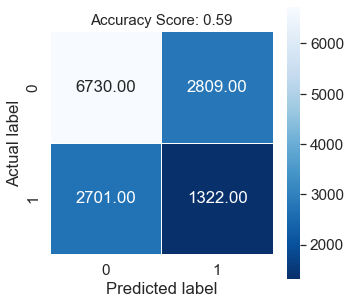

In [21]:
# matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=0.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.2f}'.format(dt.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [22]:
# feature importance
feature_importances = pd.DataFrame(dt.feature_importances_,
                                    index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                           importance
qtde_celula                  0.058469
tot_sms_env_receb            0.053201
tot_volume                   0.051341
tot_chamada                  0.042814
tot_duracao_chamada          0.042193
vol_Video                    0.041470
originada_perc               0.040763
vol_Comunicacao              0.040718
vol_Rede_Social              0.039935
OCUP_STATUS_p                0.038539
eficiencia_Voz               0.036559
ANF                          0.034986
vol_ul_perc                  0.034716
eficiencia_pdp               0.034571
DISP_STATUS_p                0.031515
vol_Loja_de_Apps             0.030090
qtde_municipio               0.029328
VoLTE_perc                   0.028264
vol_Google                   0.025646
vol_Navegacao                0.021355
vol_4g_perc                  0.019032
vol_InternetBank             0.017084
vol_gratuito_perc            0.016855
ACD_STATUS_p                 0.015838
vol_MarketPlace              0.015731
vol_Transpor

### XGBoost (Gradient Boosting)

In [23]:
xgb = XGBClassifier(objective='binary:hinge')
xgb.get_params()

{'objective': 'binary:hinge',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [24]:
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81      9539
           1       0.45      0.10      0.17      4023

    accuracy                           0.70     13562
   macro avg       0.58      0.52      0.49     13562
weighted avg       0.64      0.70      0.62     13562



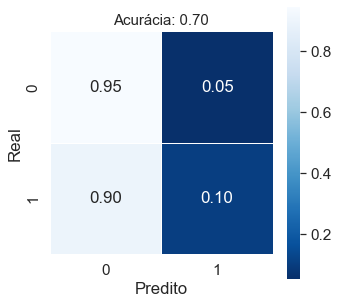

In [26]:
# matriz de confusão
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=0.5, square = True, cmap = 'Blues_r');
plt.ylabel('Real');
plt.xlabel('Predito');
all_sample_title = 'Acurácia: {:.2f}'.format(xgb.score(X_test, y_test))
plt.title(all_sample_title, size = 15);
plt.show()

# salvar em pdf
#plt.savefig('plots/xgb_cm_trapaceira.pdf', bbox_inches='tight')

In [27]:
# feature importance
feature_importances = pd.DataFrame(xgb.feature_importances_,
                                    index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                           importance
vol_4g_perc                  0.184541
dias_franquia_zerada         0.083169
VoLTE_perc                   0.081760
vol_MarketPlace              0.079752
qtde_celula                  0.075542
Qtd_CRM                      0.070628
device_tech_5G               0.021720
CUSTOMER_SEGMENT_Controle    0.020021
vol_Navegacao                0.011068
vol_TIM                      0.010949
CUSTOMER_SEGMENT_Pré-pago    0.010393
qtde_municipio               0.010310
term_fabr_asus               0.010244
vol_Musica                   0.010206
originada_perc               0.010000
CUSTOMER_SEGMENT_Pós-pago    0.009602
dias_traf_red                0.009503
term_fabr_samsung            0.009351
vol_Video                    0.009111
eficiencia_Voz               0.008841
eficiencia_pdp               0.008484
OCUP_STATUS_p                0.008472
device_tech_4G               0.008407
ACD_STATUS_p                 0.008386
vol_Alimentacao              0.008262
vol_Comunica

## SHAP

In [28]:
'''import shap
shap.initjs()'''

'import shap\nshap.initjs()'

In [29]:
'''explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(X_test_scaled)'''

'explainer = shap.Explainer(rf)\nshap_values = explainer.shap_values(X_test_scaled)'

In [30]:
'''shap.summary_plot(shap_values, X_test_scaled)'''

'shap.summary_plot(shap_values, X_test_scaled)'

In [31]:
'''shap.summary_plot(shap_values[0], X_test_scaled)'''

'shap.summary_plot(shap_values[0], X_test_scaled)'